<a href="https://colab.research.google.com/github/Nisarga253/Deep-Learning/blob/main/MODIFICATIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#TRAINING AS BATCH
import numpy as np

def step_function(v):
    return 1 if v >= 0 else 0

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand(1)
        self.learning_rate = learning_rate

    def predict(self, x):
        v = np.dot(self.weights, x) + self.bias
        return step_function(v)

    def train(self, x, target):
        prediction = self.predict(x)
        error = target - prediction
        self.weights += self.learning_rate * error * x
        self.bias += self.learning_rate * error

    def train_batch(self, X_batch, y_batch):
        total_error = 0
        for x, target in zip(X_batch, y_batch):
            prediction = self.predict(x)
            error = target - prediction
            self.weights += self.learning_rate * error * x
            self.bias += self.learning_rate * error
            total_error += abs(error)
        return total_error / len(y_batch)

def AND_gate(perceptron, x):
    return perceptron.predict(x)

def OR_gate(perceptron, x):
    return perceptron.predict(x)

def NOT_gate(perceptron, x):
    return perceptron.predict(np.array([x]))

def XOR_gate(perceptrons, x):
    y1 = AND_gate(perceptrons['AND'], x)
    y2 = OR_gate(perceptrons['OR'], x)
    y3 = NOT_gate(perceptrons['NOT'], y1)
    final_output = AND_gate(perceptrons['AND'], np.array([y2, y3]))
    return final_output

def train_logic_gates(perceptrons, epochs=1000):
    and_inputs = [np.array([0, 0]), np.array([0, 1]), np.array([1, 0]), np.array([1, 1])]
    and_targets = [0, 0, 0, 1]
    for _ in range(epochs):
        perceptrons['AND'].train_batch(and_inputs, and_targets)

    or_inputs = [np.array([0, 0]), np.array([0, 1]), np.array([1, 0]), np.array([1, 1])]
    or_targets = [0, 1, 1, 1]
    for _ in range(epochs):
        perceptrons['OR'].train_batch(or_inputs, or_targets)

    not_inputs = [np.array([0]), np.array([1])]
    not_targets = [1, 0]
    for _ in range(epochs):
        perceptrons['NOT'].train_batch(not_inputs, not_targets)

perceptrons = {
    'AND': Perceptron(input_size=2),
    'OR': Perceptron(input_size=2),
    'NOT': Perceptron(input_size=1)
}

train_logic_gates(perceptrons, epochs=1000)

test_cases = [np.array([0, 0]), np.array([0, 1]), np.array([1, 0]), np.array([1, 1])]

print("Trained XOR Gate Results:")
for test in test_cases:
    result = XOR_gate(perceptrons, test)
    print(f"XOR({test[0]}, {test[1]}) = {result}")
# Example usage in training loop
X_batch = [np.array([0, 0]), np.array([0, 1]), np.array([1, 0]), np.array([1, 1])]
y_batch = [0, 0, 0, 1]  # AND gate target values

perceptron = Perceptron(input_size=2)
for epoch in range(10):  # Assume 10 epochs for demonstration
    avg_error = perceptron.train_batch(X_batch, y_batch)
    print(f"Epoch {epoch + 1}, Average Error: {avg_error}")



Trained XOR Gate Results:
XOR(0, 0) = 0
XOR(0, 1) = 1
XOR(1, 0) = 1
XOR(1, 1) = 0
Epoch 1, Average Error: 0.75
Epoch 2, Average Error: 0.75
Epoch 3, Average Error: 1.0
Epoch 4, Average Error: 0.75
Epoch 5, Average Error: 0.75
Epoch 6, Average Error: 0.25
Epoch 7, Average Error: 0.0
Epoch 8, Average Error: 0.0
Epoch 9, Average Error: 0.0
Epoch 10, Average Error: 0.0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with SGD Optimizer:
Epoch 1/50-SGD Loss:0.864547
Epoch 2/50-SGD Loss:0.832677
Epoch 3/50-SGD Loss:0.821898
Epoch 4/50-SGD Loss:0.816145
Epoch 5/50-SGD Loss:0.811623
Epoch 6/50-SGD Loss:0.808948
Epoch 7/50-SGD Loss:0.806223
Epoch 8/50-SGD Loss:0.803969
Epoch 9/50-SGD Loss:0.801940
Epoch 10/50-SGD Loss:0.799795
Epoch 11/50-SGD Loss:0.798357
Epoch 12/50-SGD Loss:0.796905
Epoch 13/50-SGD Loss:0.795337
Epoch 14/50-SGD Loss:0.794337
Epoch 15/50-SGD Loss:0.793012
Epoch 16/50-SGD Loss:0.792588
Epoch 17/50-SGD Loss:0.790868
Epoch 18/50-SGD Loss:0.789866
Epoch 19/50-SGD Loss:0.788843
Epoch 20/50-SGD Loss:0.787966
Epoch 21/50-SGD Loss:0.786900
Epoch 22/50-SGD Loss:0.785665
Epoch 23/50-SGD Loss:0.785117
Epoch 24/50-SGD Loss:0.784117
Epoch 25/50-SGD Loss:0.783163
Epoch 26/50-SGD Loss:0.782205
Epoch 27/50-SGD Loss:0.781461
Epoch 28/50-SGD Loss:0.780847
Epoch 29/50-SGD Loss:0.779969
Epoch 30/50-SGD Loss:0.779140
Epoch 31/50-SGD Loss:0.778198
Epoch 32/50-SGD Loss:0.777511
Epoch 33/50-SGD Los

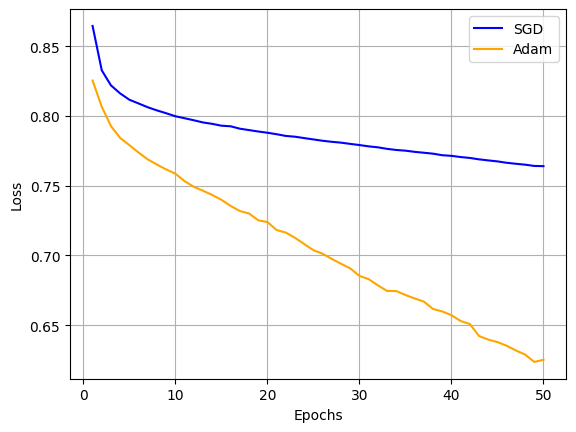

In [ ]:
#REPLACING LOSS FUNCTION AS MEAN_SQUARED_ERROR as MEAN_ABSOLUTE_ERROR
import tensorflow as tf
from tensorflow.keras import layers,models,optimizers
import numpy as np
import matplotlib.pyplot as plt

def create_data():
    X=np.random.randn(1000,10)
    y=np.random.randn(1000,1)
    return X,y

def create_model():
  model = models.Sequential([
      layers.Dense(50,activation='relu',input_shape=(10,)),
      layers.Dense(20,activation='relu'),
      layers.Dense(1)
  ])
  return model

def train_model(model,optimizer,X,y,batch_size,epochs,optimizer_name):
  model.compile(optimizer=optimizer,loss='mean_absolute_error')
  history=[]

  for epoch in range(epochs):
    hist=model.fit(X,y,batch_size=batch_size,epochs=1,verbose=0)
    loss=hist.history['loss'][0]
    history.append(loss)
    print(f"Epoch {epoch+1}/{epochs}-{optimizer_name} Loss:{loss:4f}")
  return history

X,y=create_data()
model_sgd=create_model()
model_Adam=create_model()
optimizer_sgd=optimizers.SGD(learning_rate=0.01)
optimizer_adam=optimizers.Adam(learning_rate=0.001)

epochs=50
batch_size=32

print("\nTraining with SGD Optimizer:")
sgd_loss=train_model(model_sgd,optimizer_sgd,X,y,batch_size,epochs,'SGD')

print("\nTraining with Adam Optimizer:")
adam_loss=train_model(model_Adam,optimizer_adam,X,y,batch_size,epochs,'Adam')
plt.plot(range(1,epochs+1),sgd_loss,label='SGD',color="blue")
plt.plot(range(1,epochs+1),adam_loss,label='Adam',color="orange")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 35ms/step - accuracy: 0.8844 - loss: 0.3628 - val_accuracy: 0.9839 - val_loss: 0.0516
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.9843 - loss: 0.0502 - val_accuracy: 0.9884 - val_loss: 0.0350
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.9883 - loss: 0.0365 - val_accuracy: 0.9897 - val_loss: 0.0339
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.9914 - loss: 0.0270 - val_accuracy: 0.9911 - val_loss: 0.0286
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9931 - loss: 0.0221 - val_accuracy: 0.9892 - val_loss: 0.0385
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9856 - loss: 0.0527
Test Accuracy: 0.9891999959945679


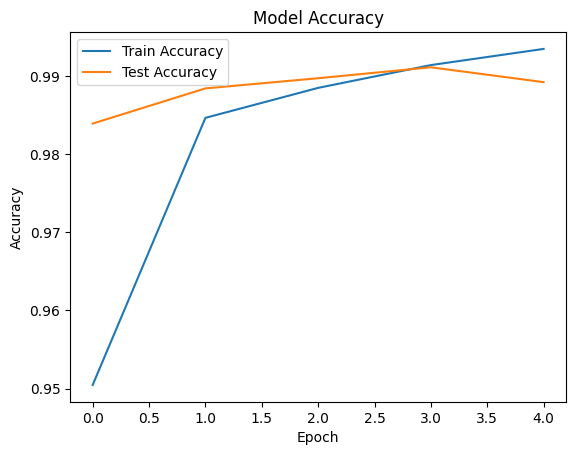

In [ ]:
#ADD MORE CONVOLUTIONAL LAYER
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess data
(train_imgs, train_labels), (test_imgs, test_labels) = datasets.mnist.load_data()

# Reshaping and normalizing image data
train_imgs = train_imgs.reshape((train_imgs.shape[0], 28, 28, 1)).astype('float32') / 255
test_imgs = test_imgs.reshape((test_imgs.shape[0], 28, 28, 1)).astype('float32') / 255

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Change 5x5 kernel to 3x3 to fix the dimension issue
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
hist = model.fit(train_imgs, train_labels, epochs=5, validation_data=(test_imgs, test_labels))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_imgs, test_labels)
print(f'Test Accuracy: {test_acc}')

# Plot training and validation accuracy
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


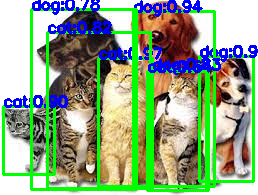

Detected objects count:
dog: 4
cat: 4
Count of 'bench': 0


In [7]:
import torch
import torchvision
from torchvision.transforms import functional as F
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

COCO_INSTANCE_CATEGORY_NAMES = ['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
                                'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter',
                                'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe',
                                'N/A', 'backpack', 'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
                                'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
                                'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
                                'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair',
                                'couch', 'potted plant', 'bed', 'dining table', 'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop',
                                'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator',
                                'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

def detect_objects(image_path, confidence_threshold=0.5):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image from {image_path}. Please check the file path and ensure the image exists.")
        return None

    original_image = image.copy()
    image_tensor = F.to_tensor(image).unsqueeze(0)

    with torch.no_grad():
        predictions = model(image_tensor)

    boxes = predictions[0]['boxes'].cpu().numpy()
    labels = predictions[0]['labels'].cpu().numpy()
    scores = predictions[0]['scores'].cpu().numpy()

    object_counts = {}


    for i, box in enumerate(boxes):
        if scores[i] > confidence_threshold:
            label = COCO_INSTANCE_CATEGORY_NAMES[labels[i]]
            score = scores[i]
            start_point = (int(box[0]), int(box[1]))
            end_point = (int(box[2]), int(box[3]))

            cv2.rectangle(original_image, start_point, end_point, (0, 255, 0), 2)
            cv2.putText(original_image, f"{label}:{score:.2f}", start_point, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)


            if label in object_counts:
                object_counts[label] += 1
            else:
                object_counts[label] = 1

    return original_image, object_counts

def count_specific_object(object_name, object_counts):

    return object_counts.get(object_name, 0)

if __name__ == "__main__":
    image_path = '/cd.jpg'
    detected_image, object_counts = detect_objects(image_path)

    if detected_image is not None:

        cv2_imshow(detected_image)


        print("Detected objects count:")
        for obj, count in object_counts.items():
            print(f"{obj}: {count}")

        object_name = 'bench'
        count = count_specific_object(object_name, object_counts)
        print(f"Count of '{object_name}': {count}")
